In [7]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# Carico i Dati
PimaDB=pd.read_csv("https://raw.githubusercontent.com/ettore1461/My-Introduction-to-Statistical-Learning/master/Dataset/PimaDB/PimaDB.csv")

# Boosting

si utilizzera la libreria `xgboost` che estende il classico algoritmo di _Gradient Boosting_

`xgboost` è un metodo ensamble di tipo supervisionato, che lavora su vettori di tipo numerico, costruendo degli alberi di regressioni e poi aggregandone i risultati

# Metodi Ensamble

* ## Bagging
funziona insieme a un classificatore

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
PimaDB.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
Y=PimaDB.iloc[:,-1]
X=PimaDB.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [13]:
bagging = BaggingClassifier(KNeighborsClassifier()
                            ,max_samples=0.5 
                            ,max_features=0.5 
                           )

In [21]:
scores = cross_val_score(bagging,x_train,y_train) # di default esegue il 3-fold CV
scores.mean()

0.74301675977653636

In [22]:
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [23]:
pred = bagging.predict(x_test)

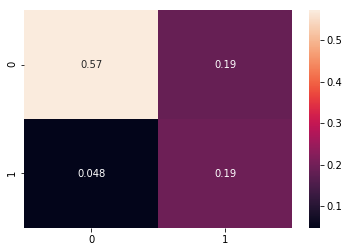

In [26]:
sns.heatmap(confusion_matrix(pred,y_test)/pred.size,annot=True)

In [27]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.92      0.75      0.83       175
          1       0.51      0.80      0.62        56

avg / total       0.82      0.77      0.78       231

